In [92]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import itertools
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [93]:
# true values
_a = 0.5
_b = 0.3

In [100]:
# samples
points = np.array([[x, _a * x + _b + .1 * np.random.randn() + (np.random.randint(100) == 0) * np.random.rand() * 1000] for x in np.arange(0, 10, 0.01)])

(0, 10)

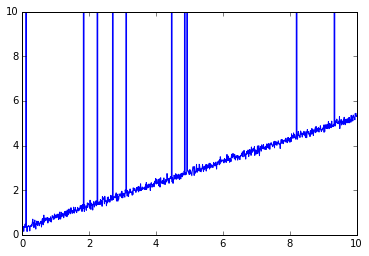

In [101]:
plt.plot(points[:, 0], points[:, 1])
plt.ylim(0, 10)

In [102]:
data = points



In [126]:
def getParamWithSamples(samples):
    p0 = samples[0]
    p1 = samples[1]
    dp = p1 - p0
    a = dp[1] / dp[0]
    b = p0[1] - a * p0[0]
    return a, b
    
def applyModel(model, x):
    a = model[0]
    b = model[1]
    return a * x + b
   

def getError(model, p):
    x = p[0]
    y = p[1]
    return np.abs(applyModel(model, x) - y)

def errorGrad(model, data):
    a = model[0]
    b = model[1]
    x = data[:, 0]
    y = data[:, 1]
    ga = (2 * (a * x + b - y) * x).sum()
    gb = (2 * (a * x + b - y)).sum()
    return np.array([ga, gb])


import numpy as np


def ransac(data,
        # parameters for RANSAC
        n = 2, # required sample num to decide parameter
        k = 100, # max loop num
        t = 2.0, # threshold error val for inlier
        d = 800 # requrired inlier sample num to be correnct param
    ):

    good_models = []
    good_model_errors = []
    iterations = 0
    while iterations < k:
        sample = data[np.random.choice(len(data), 2, False)]
        param = getParamWithSamples(sample)

        inliers = []
        for p in data:
            if (p == sample).all(1).any(): continue
            if getError(param, p) > t:
                continue
            else:
                inliers.append(p)


        if len(inliers) > d:
            current_error = np.array([getError(param, p) for p in data]).mean()
            good_models.append(param)
            good_model_errors.append(current_error)

        iterations += 1
        
    best_index = np.argmin(good_model_errors)
    return good_models[best_index]

def leastSquare(data):
    # Simulated Annealing
    tau = 100
    bestfit = None
    besterr = float('inf')
    model = np.zeros(2)
    while tau >= 0.0001:
        for _ in range(10):
            grad = errorGrad(model, data)
            grad /= np.linalg.norm(grad)
            grad *= -1
            model += grad * tau
            
        tau *= 0.1
    return model
                

In [127]:
a, b = ransac(data)
print a, b

0.496228888599 0.299107809476


(0, 10)

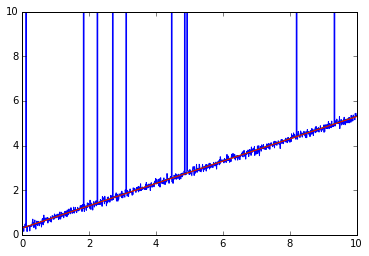

In [121]:
plt.plot(data[:, 0], data[:, 1])
l = np.array([(x, applyModel((a, b), x)) for x in data[:, 0]])
plt.plot(l[:, 0], l[:, 1])
l = np.array([(x, applyModel((_a, _b), x)) for x in data[:, 0]])
plt.plot(l[:, 0], l[:, 1])
plt.ylim(0, 10)
